Extracting EDF parameters from D:\Major_Project\dataset\San Diego\sub-hc2\ses-hc\eeg\sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


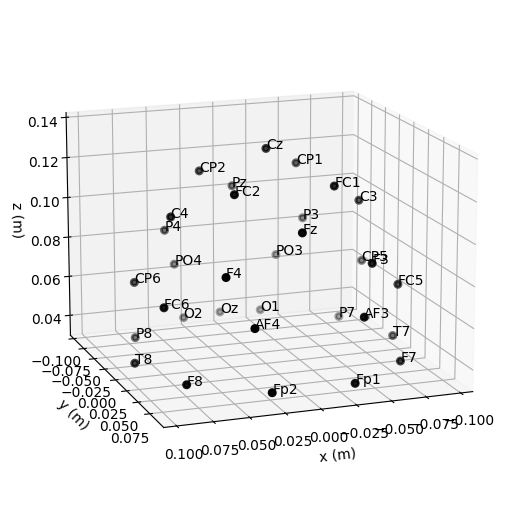

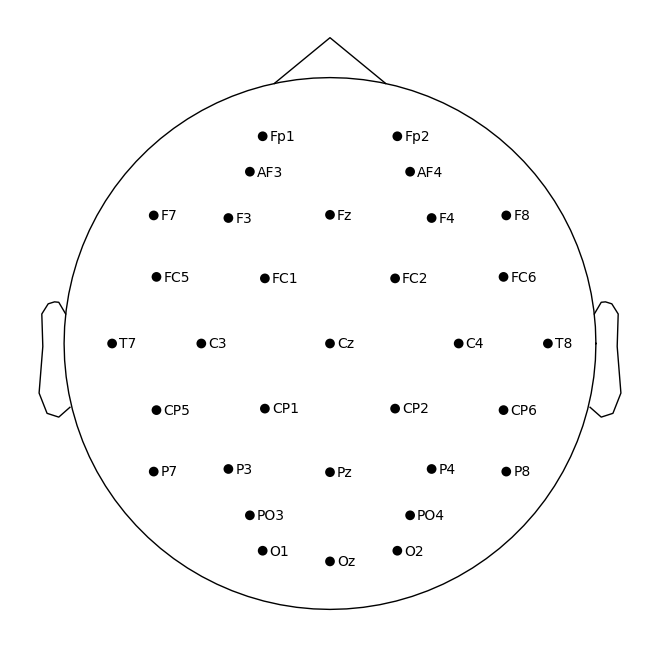

Fitting ICA to data using 32 channels (please be patient, this may take a while)


C:\Users\alech\AppData\Local\Temp\ipykernel_2016\17868674.py:16: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 32 components
Fitting ICA took 4.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated


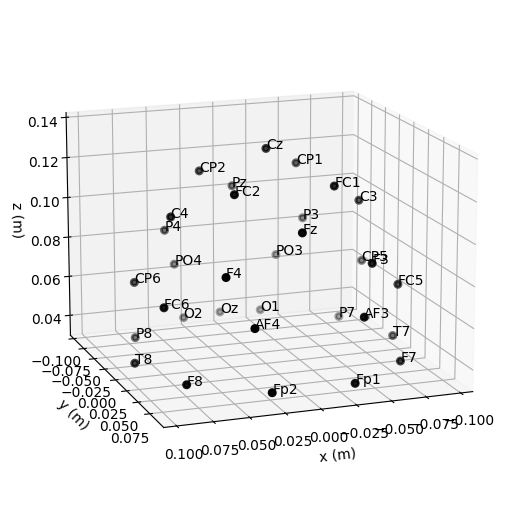

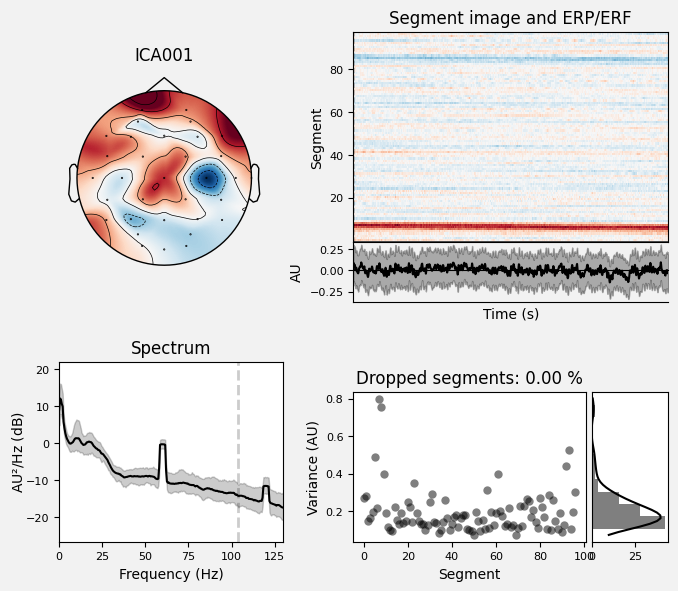

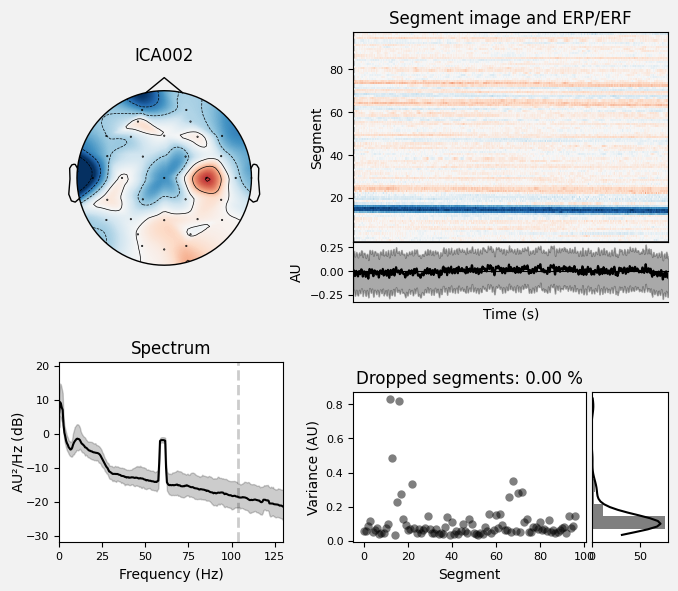

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
import mne;
import matplotlib.pyplot as plt
cfg=[]
filename = "D:\Major_Project\dataset\San Diego\sub-hc2\ses-hc\eeg\sub-hc2_ses-hc_task-rest_eeg.bdf"
raw = mne.io.read_raw_bdf("D:\Major_Project\dataset\San Diego\sub-hc2\ses-hc\eeg\sub-hc2_ses-hc_task-rest_eeg.bdf", exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8']);
# raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
# raw.plot(duration=5, n_channels=30)
ica = mne.preprocessing.ICA(n_components=32, random_state=97, max_iter=800)
Biosim_montage = mne.channels.make_standard_montage("biosemi32")
Biosim_montage.plot()  # 2D
fig =Biosim_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15) 
raw.set_montage(Biosim_montage, on_missing='warn')

# ICA
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)




Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1 events found
Event IDs: [1]
EEG channel type selected for re-referencing
Projections have already been applied. Setting proj attribute to True.
Fitted sphere radius:         95.0 mm
Origin head coordinates:      0.0 -0.0 40.1 mm
Origin device coordinates:    0.0 -0.0 40.1 mm


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
C:\Users\alech\AppData\Local\Temp\ipykernel_2016\303158136.py:13: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True).apply_proj()


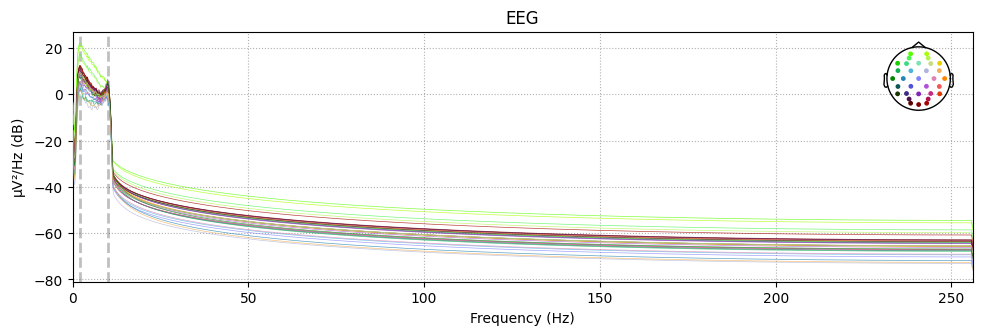

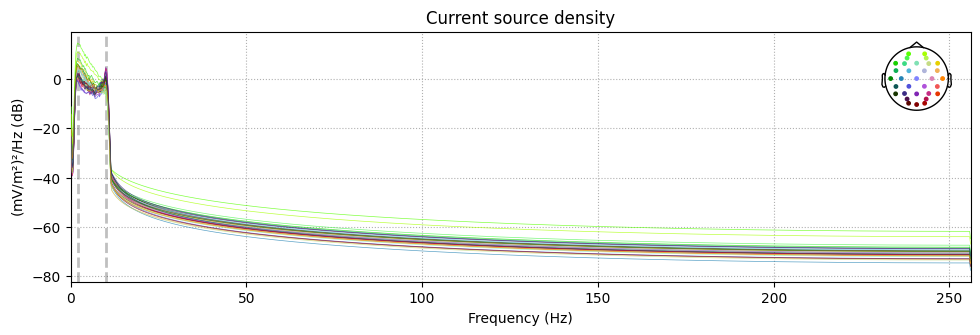

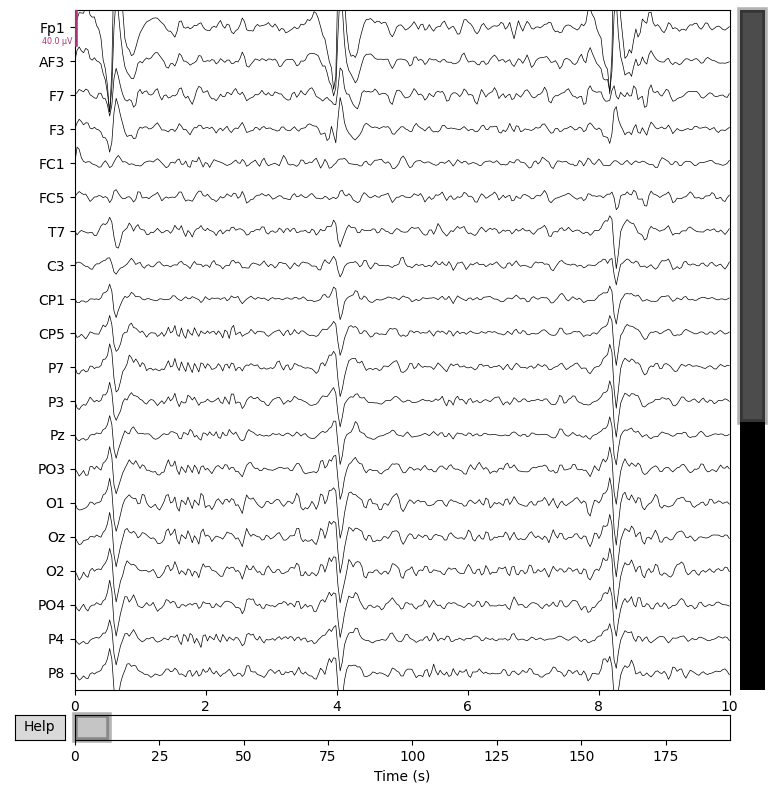

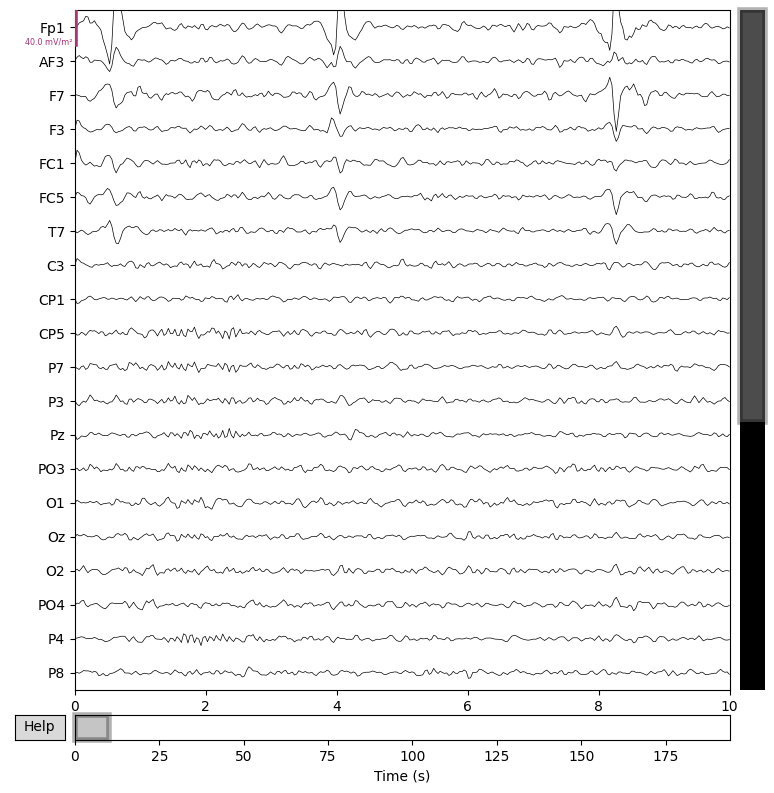

Effective window size : 4.000 (s)
Effective window size : 4.000 (s)


c:\Users\alech\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
c:\Users\alech\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


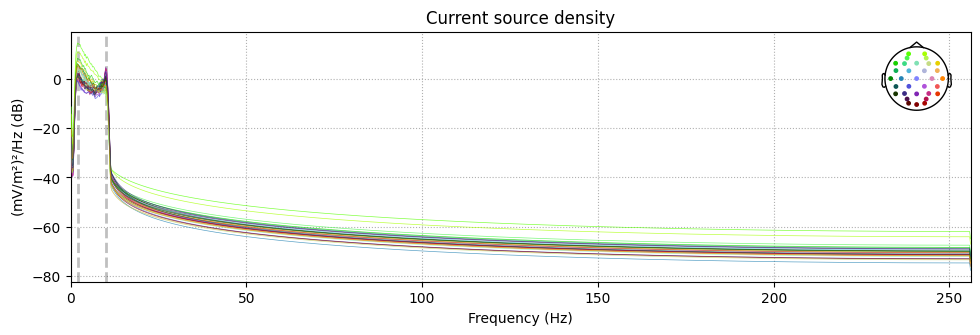

In [ ]:
# raw.copy().pick_types(eeg=False, stim=True).plot(start=3, duration=6)
import numpy as np

raw.load_data()
raw.filter(2,10);
raw = raw.pick_types(
    meg=True, eeg=True, eog=True, ecg=True, stim=True,
)



events = mne.find_events(raw)
raw.set_eeg_reference(projection=True).apply_proj()

raw_csd = mne.preprocessing.compute_current_source_density(raw)
raw_csd.plot()


raw.compute_psd().plot(picks="data", exclude="bads")
raw_csd.compute_psd().plot(picks="data", exclude="bads")


Not setting metadata
1 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 1 events and 359 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitted sphere radius:         95.0 mm
Origin head coordinates:      0.0 -0.0 40.1 mm
Origin device coordinates:    0.0 -0.0 40.1 mm
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\alech\AppData\Local\Temp\ipykernel_10380\498295624.py:9: RuntimeWarning: No matching events found for auditory/right (event id 2)
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True, on_missing='warn')
C:\Users\alech\AppData\Local\Temp\ipykernel_10380\498295624.py:9: RuntimeWarning: No matching events found for visual/left (event id 3)
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True, on_missing='warn')
C:\Users\alech\AppData\Local\Temp\ipykernel_10380\498295624.py:9: RuntimeWarning: No matching events found for visual/right (event id 4)
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True, on_missing='warn')
C:\Users\alech\AppData\Local\Temp\ipykernel_10380\498295624.py:9: RuntimeWarning: No matching events found for smiley (event id 5)
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True, on_missing='warn')
C:\Users\alech\AppData\Lo

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


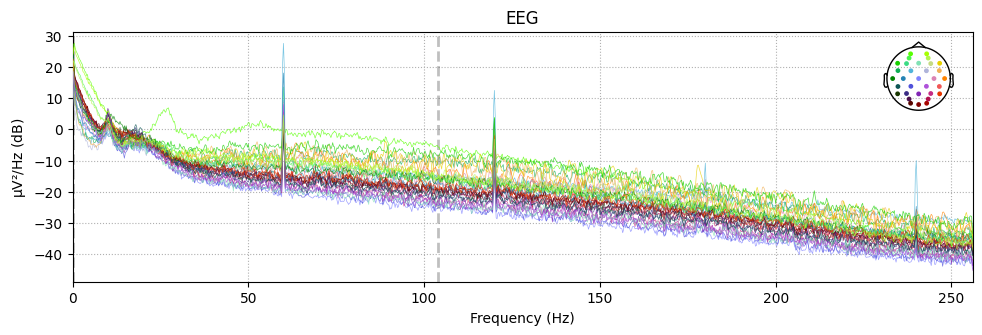

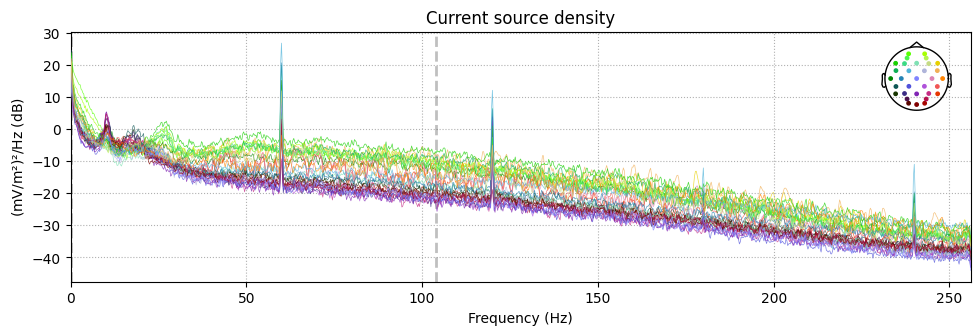

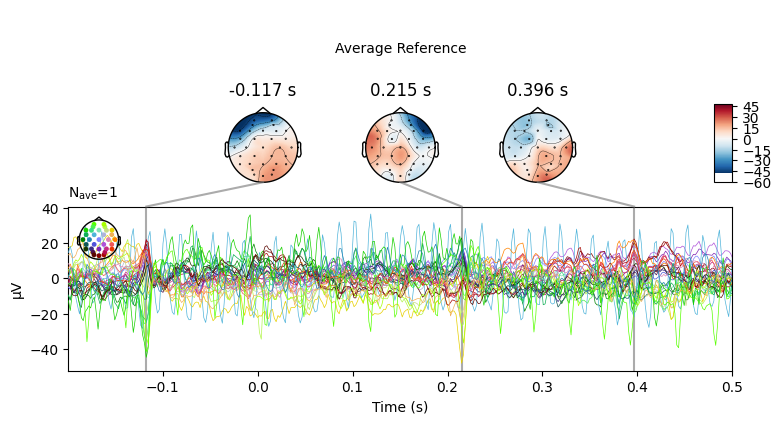

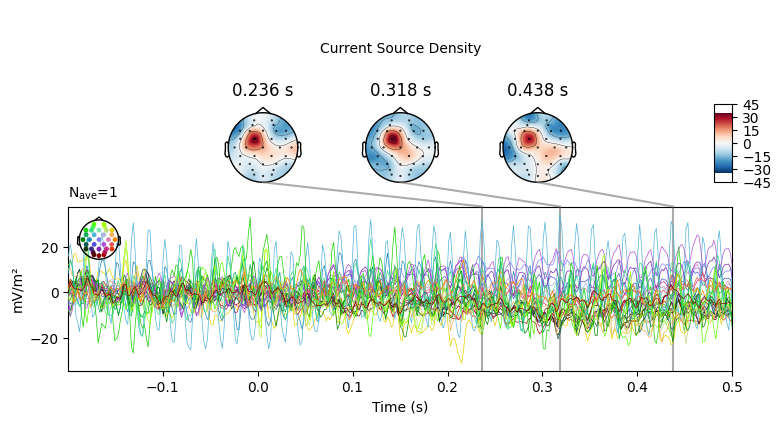

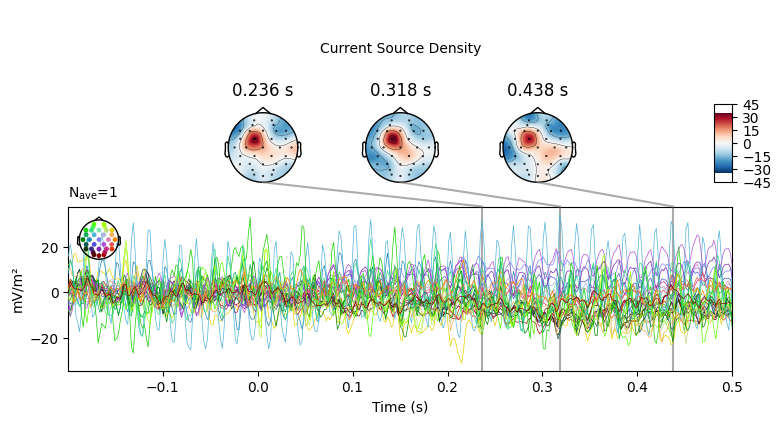

In [ ]:

event_id = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "button": 32,
}
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.5, preload=True, on_missing='warn')
evoked = epochs["auditory"].average()
times = np.array([-0.1, 0.0, 0.05, 0.1, 0.15])
evoked_csd = mne.preprocessing.compute_current_source_density(evoked)
evoked.plot_joint(title="Average Reference", show=False)
evoked_csd.plot_joint(title="Current Source Density")

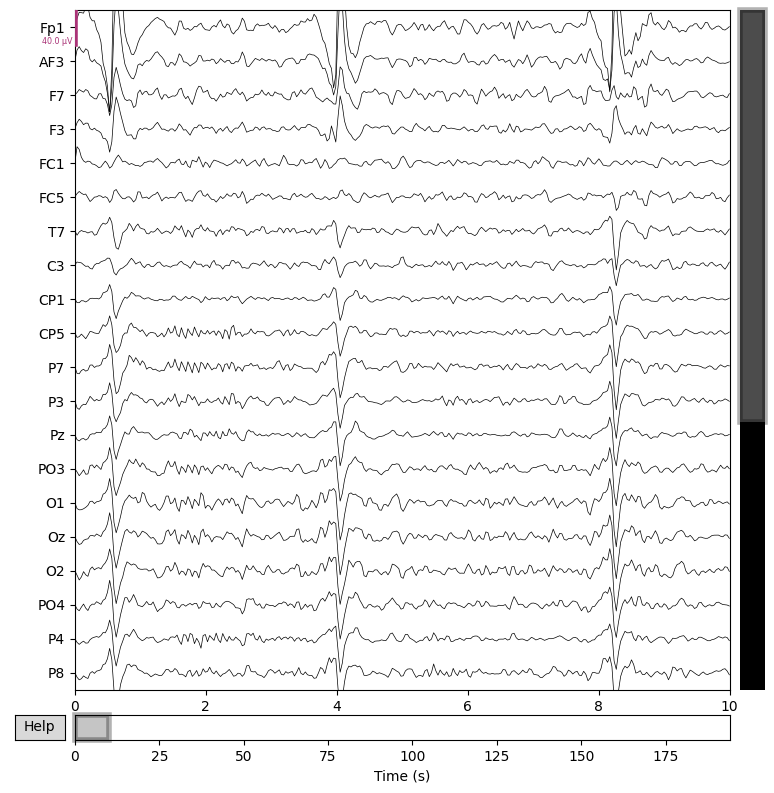

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channel: FC1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 4 ICA components
    Projecting back using 32 PCA components


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


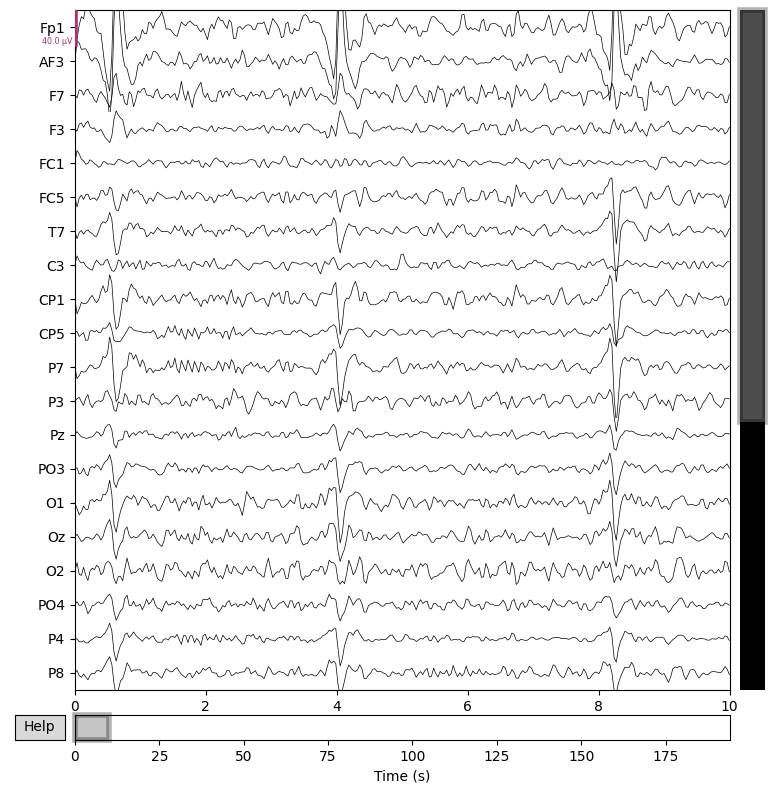

[3]


In [ ]:
raw.plot()
raw.load_data()
raw.filter(2,10);
# ica.plot_components()
ica.exclude = [1,6,13,14]
bad_idx, scores = ica.find_bads_eog(raw, 'FC1', threshold=2)
ica.apply(raw.copy(), exclude = ica.exclude).plot()
print(bad_idx)

In [ ]:
events = mne.find_events(raw)
print(events)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1 events found
Event IDs: [1]
[[4534    0    1]]
